In [1]:
# Importing necessary libraries
import pandas as pd          # For data manipulation and analysis
import numpy as np           # For numerical operations
import matplotlib.pyplot as plt   # For visualizing data (plotting)
import seaborn as sns        # For advanced plotting
# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression   # For Linear Regression model
# For Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
# For evaluating model performance (R2 score, RMSE)
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset into a pandas DataFrame using the correct file name
df = pd.read_csv("uber.csv")

# Display the first few rows of the dataset to understand its structure
print(df.head())

   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

In [3]:
# Checking for missing values in the dataset
print("Missing values in the dataset:")
# It returns the count of missing values for each column
print(df.isnull().sum())

# Removing rows with missing values
df = df.dropna()

# Converting the pickup_datetime column to pandas datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extracting date-related features like hour, day, month, and year from pickup_datetime
df['hour'] = df['pickup_datetime'].dt.hour  # Extracting the hour of the day
df['day'] = df['pickup_datetime'].dt.day    # Extracting the day of the month
df['month'] = df['pickup_datetime'].dt.month  # Extracting the month
df['year'] = df['pickup_datetime'].dt.year  # Extracting the year

Missing values in the dataset:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


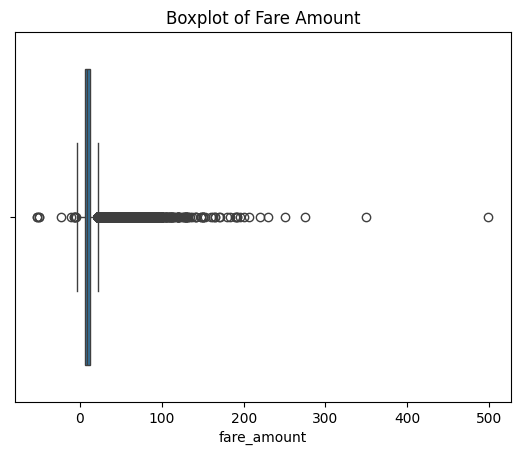

In [4]:
# Checking for outliers in the fare_amount column using a boxplot
sns.boxplot(x=df['fare_amount'])
plt.title('Boxplot of Fare Amount')  # Adding title to the plot
plt.show()  # Display the plot

# Removing any negative fare amounts and any fares above 200 (possible outliers)
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] <= 200)]

Non-numeric columns: Index(['key'], dtype='object')


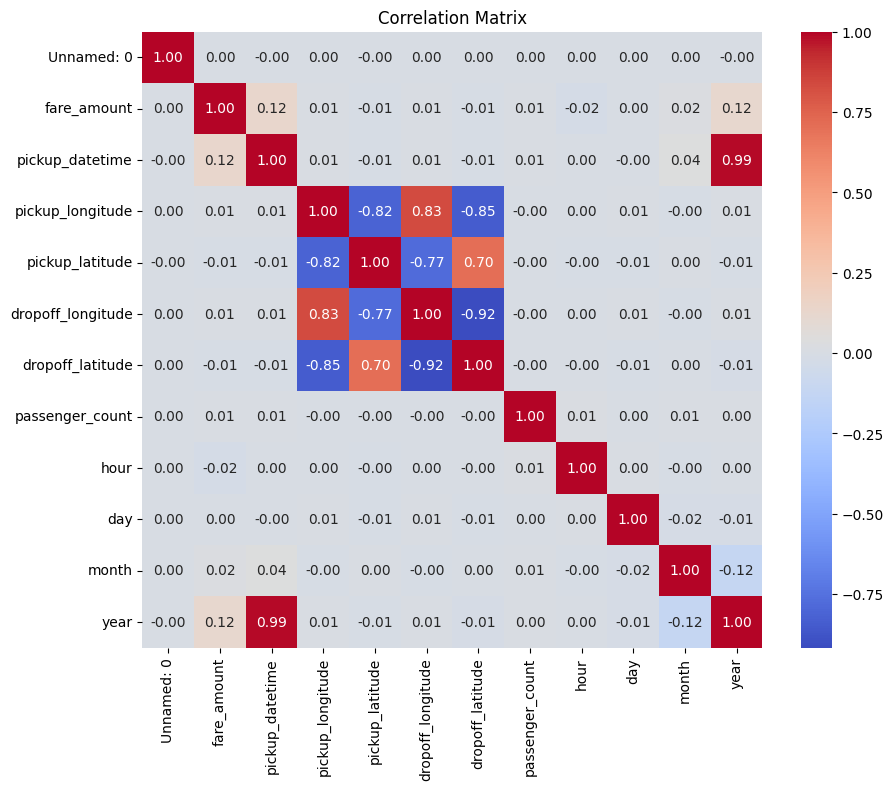

In [5]:
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object', 'datetime']).columns
print("Non-numeric columns:", non_numeric_cols)

# Drop non-numeric columns to calculate correlation on numeric columns only
df_numeric = df.drop(columns=non_numeric_cols)

# Generating the correlation matrix to check relationships between features and the target variable (fare_amount)
correlation_matrix = df_numeric.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Setting the figure size for better readability
# Displaying the correlation matrix with color intensity
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')  # Title of the plot
plt.show()  # Display the plot

In [6]:
# Selecting the relevant features (independent variables) for prediction
features = ['hour', 'day', 'month', 'year', 'pickup_latitude',
            'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']

# Defining the target variable (dependent variable) which is the fare_amount
target = 'fare_amount'

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X = df[features]  # Features for the model
y = df[target]    # Target variable (fare_amount)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)  # Random 80-20 split

In [7]:
# Implementing Linear Regression Model
# Creating an instance of the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)  # Training the model with the training data

# Predicting the fare amounts on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluating the Linear Regression model
print("Linear Regression Model Evaluation:")
# R2 score gives the proportion of variance explained by the model
print("R2 Score: ", r2_score(y_test, y_pred_linear))
# RMSE is the root of mean squared error, a measure of prediction accuracy
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_linear)))

Linear Regression Model Evaluation:
R2 Score:  0.017434924442325306
RMSE:  9.851475629947625


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Reduce the number of estimators to speed up training
random_forest_model = RandomForestRegressor(
    n_estimators=50, random_state=42, n_jobs=-1)

# Training the model with the training data
random_forest_model.fit(X_train, y_train)

# Predicting the fare amounts on the test set using Random Forest
y_pred_rf = random_forest_model.predict(X_test)

# Evaluating the Random Forest model
print("\nRandom Forest Model Evaluation:")
# R2 score for Random Forest model
print("R2 Score: ", r2_score(y_test, y_pred_rf))
# RMSE for Random Forest model
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest Model Evaluation:
R2 Score:  0.8089548405578484
RMSE:  4.343988279281025


In [9]:
# Comparing the performance of both models (Linear Regression vs Random Forest)
print("\nModel Comparison:")
print("Linear Regression R2 Score:", r2_score(
    y_test, y_pred_linear))  # R2 score for Linear Regression
print("Random Forest R2 Score:", r2_score(
    y_test, y_pred_rf))  # R2 score for Random Forest


Model Comparison:
Linear Regression R2 Score: 0.017434924442325306
Random Forest R2 Score: 0.8089548405578484
